___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_columns", None)

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [95]:
SEED = 42
keras.utils.set_random_seed(SEED)


# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [96]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [97]:
print(f"There are {len(X_train)} sampels for training")
print(f"There are {len(X_test)} sampels for testing")

There are 60000 sampels for training
There are 10000 sampels for testing


In [98]:
# check the shape of one of the sampels
X_train[0].shape

(28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

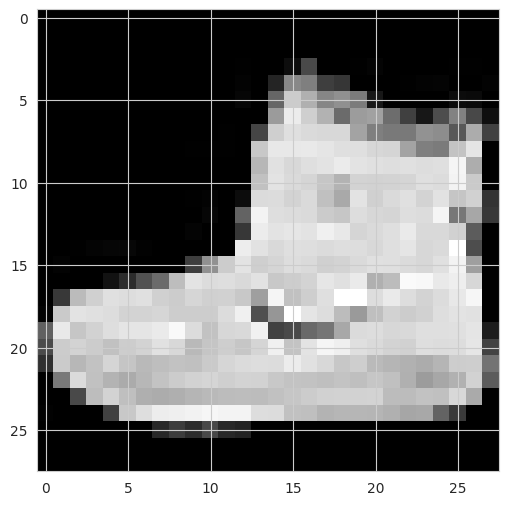

In [99]:
plt.imshow(X_train[0], cmap="gray")
plt.show()

In [100]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [101]:
X_train[0].min()

0

In [102]:
X_train[0].max()

255

In [103]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train=X_train/255
X_test=X_test/255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [104]:
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)

In [105]:
X_train.shape

(60000, 28, 28, 1)

In [106]:
X_test.shape

(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [107]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

Y_test.shape

(10000, 10)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [108]:
model = Sequential()

model.add(
    Conv2D(filters=28, kernel_size=(3, 3), input_shape=X_train[0].shape, activation="relu")
)  # stride = 1, padding = valid

model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))  # stride = pool size, padding = valid

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 25, 25, 28)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 17500)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               2240128   
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
________________

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [109]:
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=4, restore_best_weights=True
)

In [110]:
model.fit(x=X_train, y=Y_train,
    batch_size=500,
    epochs=100,
    callbacks=[early_stop],
    validation_split=0.1,
    shuffle=True,
    workers=-1,
    use_multiprocessing=False)

Epoch 1/100
108/108 [==============================] - 2s 13ms/step - loss: 0.6833 - accuracy: 0.7616 - val_loss: 0.4414 - val_accuracy: 0.8375
Epoch 2/100
108/108 [==============================] - 1s 9ms/step - loss: 0.3956 - accuracy: 0.8590 - val_loss: 0.3411 - val_accuracy: 0.8802
Epoch 3/100
108/108 [==============================] - 1s 10ms/step - loss: 0.3378 - accuracy: 0.8804 - val_loss: 0.3115 - val_accuracy: 0.8892
Epoch 4/100
108/108 [==============================] - 1s 9ms/step - loss: 0.3019 - accuracy: 0.8914 - val_loss: 0.2920 - val_accuracy: 0.8955
Epoch 5/100
108/108 [==============================] - 1s 9ms/step - loss: 0.2773 - accuracy: 0.8993 - val_loss: 0.2806 - val_accuracy: 0.8953
Epoch 6/100
108/108 [==============================] - 1s 8ms/step - loss: 0.2553 - accuracy: 0.9074 - val_loss: 0.2790 - val_accuracy: 0.8972
Epoch 7/100
108/108 [==============================] - 1s 9ms/step - loss: 0.2436 - accuracy: 0.9115 - val_loss: 0.2612 - val_accuracy: 0.90

**TASK 7: Plot values of metrics you used in your model.**

<Axes: >

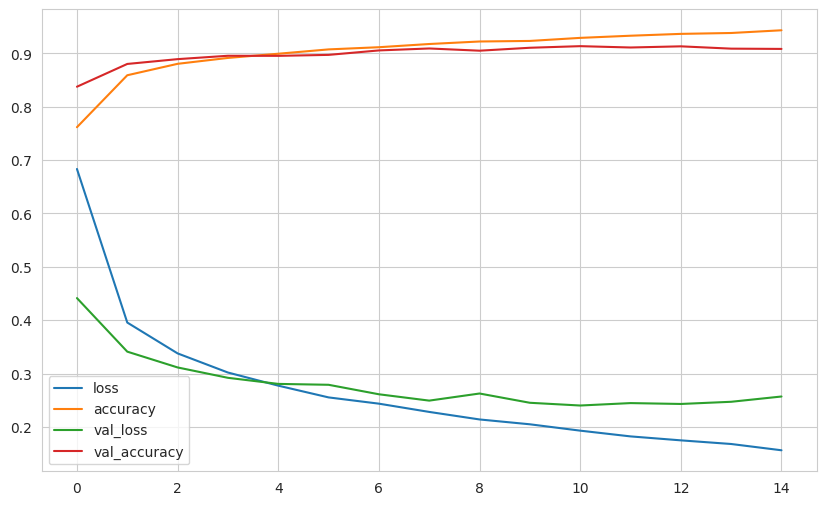

In [111]:
pd.DataFrame(model.history.history).plot()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [112]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [113]:
pred_prob.shape

(10000, 10)

In [114]:
Y_pred = np.argmax(pred_prob, axis=1)
Y_test = np.argmax(Y_test, axis=1)

In [115]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.86      0.84      0.85      1000
           3       0.87      0.94      0.91      1000
           4       0.86      0.83      0.84      1000
           5       0.97      0.97      0.97      1000
           6       0.74      0.74      0.74      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



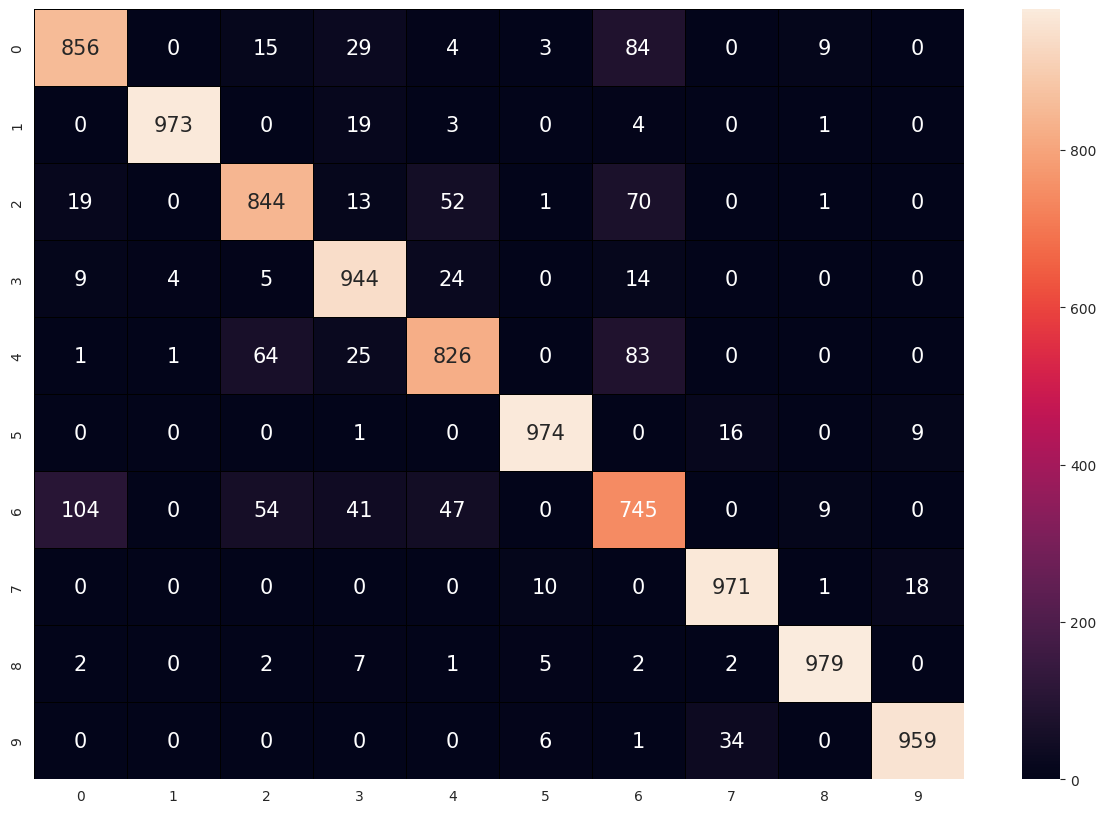

In [116]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(Y_test, Y_pred),
    annot=True,
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

## Prediction

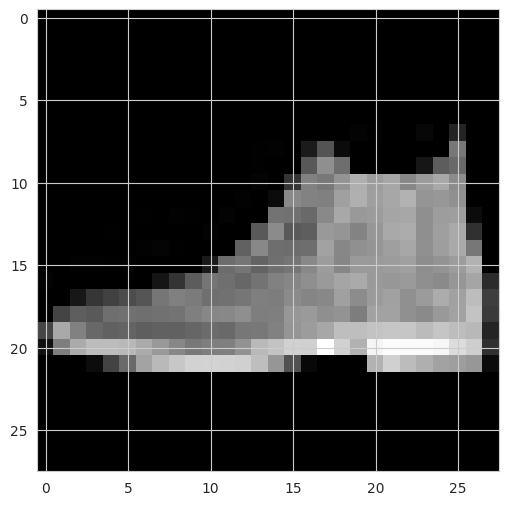

In [117]:
plt.imshow(X_test[0], cmap="gray")
plt.show()

In [119]:
pred_prob = model.predict(np.expand_dims(X_test[0], 0))
Y_pred = np.argmax(pred_prob, axis=1)


1/1 [==============================] - 0s 18ms/step


In [121]:
classes[Y_pred[0]]

'Ankle boot'

In [122]:
classes[Y_test[0]]

'Ankle boot'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___